## Garanti Data Camp

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from tqdm.notebook import tqdm
tqdm.pandas()

SEED = 42

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

cat_feat_colors = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"]
colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', "#CCA8E9", "#F67280"]

In [2]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [3]:
def cat_plots(dataframe, cat_col):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())
    print("".center(100, "#"))

    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 3, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=colors,
            autopct='%1.0f%%')

    

    plt.subplot(1, 3, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=cat_col, palette=colors)
    plt.tight_layout(pad=3)

In [143]:
train = pd.read_csv("./data/train_users.csv")

In [129]:
test = pd.read_csv("./data/test_users.csv")

In [8]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(53019, 4)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id              int64
industry            object
location            object
moved_after_2019     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id                             industry                    location  \
0     1301  Information Technology and Services  Istanbul, Istanbul, Turkey   
1     6950                             Internet  Istanbul, Istanbul, T

In [130]:
check_df(test)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(13255, 3)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id      int64
industry    object
location    object
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id                             industry                    location
0    17449                             Research                      Turkey
1    33967                    Computer Software  Istanbul, Istanbul, Turkey
2     2110                           Automotive    

In [10]:
train.head()

,user_id,industry,location,moved_after_2019
0,1301,Information Technology and Services,"Istanbul, Istanbul, Turkey",1
1,6950,Internet,"Istanbul, Istanbul, Turkey",0
2,4880,Online Media,Turkey,0
3,26046,Telecommunications,"Istanbul, Istanbul, Turkey",0
4,11005,Banking,"Istanbul, Turkey",0


####################################################################################################
0    32496
1    20523
Name: moved_after_2019, dtype: int64
####################################################################################################


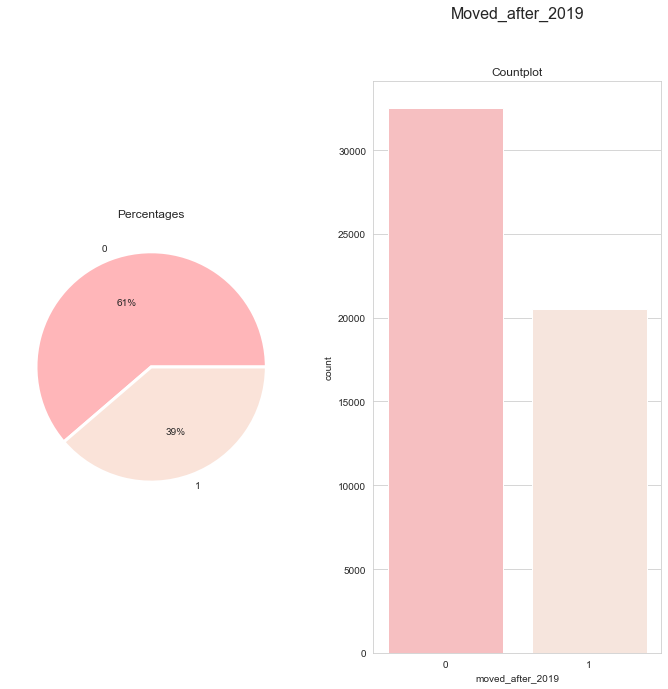

In [ ]:
cat_plots(train, "moved_after_2019")

In [28]:
train[train["location"].isna() == True]

,user_id,industry,location,moved_after_2019
41860,65204,Pharmaceuticals,NaN,0


## Raw test data

In [ ]:
train_raw = pd.read_csv("./data/train_users.csv")
test_raw = pd.read_csv("./data/test_users.csv")

In [ ]:
app_train_raw = pd.get_dummies(train_raw)
app_test_raw = pd.get_dummies(test_raw)

print('Training Features shape: ', app_train_raw.shape)
print('Testing Features shape: ', app_test_raw.shape)

Training Features shape:  (53019, 563)
Testing Features shape:  (13255, 388)


In [ ]:
labels = app_train_raw["moved_after_2019"]

app_train_raw, app_test_raw = app_train_raw.align(app_test_raw, join = 'inner', axis = 1)

app_train_raw['moved_after_2019'] = labels

print('Training Features shape: ', app_train_raw.shape)
print('Testing Features shape: ', app_test_raw.shape)

Training Features shape:  (53019, 364)
Testing Features shape:  (13255, 363)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if 'moved_after_2019' in app_train_raw:
    train = app_train_raw.drop(columns = ['moved_after_2019'])
else:
    train = app_train_raw.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test_raw.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test_raw)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (53019, 363)
Testing data shape:  (13255, 363)


In [ ]:
X = app_train_raw.drop(["moved_after_2019"], axis=1)
y = labels

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, random_state=SEED)

# Train on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, random_state=42)

In [ ]:
y_pred_test = log_reg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6105


## Test data location feature eng

In [39]:
province={
"1.0" : "Adana",
"2.0" : "Adıyaman",
"3.0" : "Afyonkarahisar",
"4.0" : "Ağrı",
"5.0" : "Amasya",
"6.0" : "Ankara",
"7.0" : "Antalya",
"8.0" : "Artvin",
"9.0" : "Aydın",
"10.0" : "Balıkesir",
"11.0" : "Bilecik",
"12.0" : "Bingöl",
"13.0" : "Bitlis",
"14.0" : "Bolu",
"15.0" : "Burdur",
"16.0" : "Bursa",
"17.0" : "Çanakkale",
"18.0" : "Çankırı",
"19.0" : "Çorum",
"20.0" : "Denizli",
"21.0" : "Diyarbakır",
"22.0" : "Edirne",
"23.0" : "Elâzığ",
"24.0" : "Erzincan",
"25.0" : "Erzurum",
"26.0" : "Eskişehir",
"27.0" : "Gaziantep",
"28.0" : "Giresun",
"29.0" : "Gümüşhane",
"30.0" : "Hakkâri",
"31.0" : "Hatay",
"32.0" : "Isparta",
"33.0" : "Mersin",
"34.0" : "İstanbul",
"35.0" : "İzmir",
"36.0" : "Kars",
"37.0" : "Kastamonu",
"38.0" : "Kayseri",
"39.0" : "Kırklareli",
"40.0" : "Kırşehir",
"41.0" : "Kocaeli",
"42.0" : "Konya",
"43.0" : "Kütahya",
"44.0" : "Malatya",
"45.0" : "Manisa",
"46.0" : "Kahramanmaraş",
"47.0" : "Mardin",
"48.0" : "Muğla",
"49.0" : "Muş",
"50.0" : "Nevşehir",
"51.0" : "Niğde",
"52.0" : "Ordu",
"53.0" : "Rize",
"54.0" : "Sakarya",
"55.0" : "Samsun",
"56.0" : "Siirt",
"57.0" : "Sinop",
"58.0" : "Sivas",
"59.0" : "Tekirdağ",
"60.0" : "Tokat",
"61.0" : "Trabzon",
"62.0" : "Tunceli",
"63.0" : "Şanlıurfa",
"64.0" : "Uşak",
"65.0" : "Van",
"66.0" : "Yozgat",
"67.0" : "Zonguldak",
"68.0" : "Aksaray",
"69.0" : "Bayburt",
"70.0" : "Karaman",
"71.0" : "Kırıkkale",
"72.0" : "Batman",
"73.0" : "Şırnak",
"74.0" : "Bartın",
"75.0" : "Ardahan",
"76.0" : "Iğdır",
"77.0" : "Yalova",
"78.0" : "Karabük",
"79.0" : "Kilis",
"80.0" : "Osmaniye",
"81.0" : "Düzce"
}


In [132]:
import swifter
from unidecode import unidecode

def check_string(string_to_check):
    string_to_check = unidecode(str(string_to_check).lower())
    if "," in string_to_check:
        sub = string_to_check.split(", ")
    else:
        sub = string_to_check.split()

    sub_dict = dict((v,unidecode(k.lower())) for v, k in province.items())

    for val in sub:
        if val in sub_dict.values():
            return val
        else:
            continue
    return val


#df['result'] = df['string_to_check'].apply(check_string)

In [144]:
train["user_location"] = train["location"].swifter.apply(check_string)

Pandas Apply:   0%|          | 0/53019 [00:00<?, ?it/s]

In [135]:
test["user_location"] = test["location"].swifter.apply(check_string)

Pandas Apply:   0%|          | 0/13255 [00:00<?, ?it/s]

In [145]:
train["user_location"] = train["user_location"].replace(['kingdom','states'],['united kingdom', 'united states'])


In [147]:
test["user_location"] = test["user_location"].replace(['kingdom','states'],['united kingdom', 'united states'])


In [149]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

industry         141
location         420
user_location     94
dtype: int64

In [150]:
test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

industry         128
location         259
user_location     64
dtype: int64

In [152]:
train.drop(columns="location", inplace=True)
test.drop(columns="location", inplace=True)

In [153]:
app_train = pd.get_dummies(train)
app_test = pd.get_dummies(test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (53019, 237)
Testing Features shape:  (13255, 193)


In [155]:
labels = app_train["moved_after_2019"]

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['moved_after_2019'] = labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (53019, 194)
Testing Features shape:  (13255, 193)


In [157]:
correlations = app_train.corr()['moved_after_2019'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 industry_Fine Art                               0.009466
industry_Financial Services                     0.010671
user_location_philippines                       0.012220
industry_Think Tanks                            0.012306
industry_Higher Education                       0.012504
industry_Restaurants                            0.013197
user_location_ankara                            0.015855
industry_Entertainment                          0.017716
industry_Aviation & Aerospace                   0.019422
industry_Political Organization                 0.020450
industry_Defense & Space                        0.029694
industry_Information Technology and Services    0.036407
industry_Internet                               0.037546
user_location_istanbul                          0.068572
moved_after_2019                                1.000000
Name: moved_after_2019, dtype: float64

Most Negative Correlations:
 user_location_turkey                           

In [160]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if 'moved_after_2019' in app_train:
    train = app_train.drop(columns = ['moved_after_2019'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (53019, 193)
Testing data shape:  (13255, 193)


In [202]:
X = app_train.drop(["moved_after_2019"], axis=1)
y = labels

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [204]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, random_state=SEED)

# Train on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, random_state=42)

In [205]:
y_pred_test = log_reg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [206]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6105


In [207]:
log_reg = LogisticRegression(C = 0.0001, random_state=SEED)
log_reg.fit(app_train.drop(columns="moved_after_2019"), labels)

y_pred_test = log_reg.predict(app_test)


In [208]:
submit = app_test[['user_id']]
submit['moved_after_2019'] = y_pred_test

submit.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [209]:
submit.moved_after_2019.value_counts()

0    13255
Name: moved_after_2019, dtype: int64

In [211]:
submit.to_csv('log_reg_baseline.csv', index = False)

In [212]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = SEED, verbose = 1, n_jobs = -1)

In [213]:
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished


In [214]:
y_pred_test = random_forest.predict(X_test)

y_pred_test

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [215]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5782


In [227]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = SEED, verbose = 1, n_jobs = -1)

In [228]:
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished


In [229]:
y_pred_test = random_forest.predict(X_test)

y_pred_test

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [230]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5969


In [238]:
app_train.to_csv("train_train_user_fe.csv")
app_test.to_csv("test_test_user_fe.csv")

## TODO: language.csv - **agg** - profiency ordinal

In [37]:
train = pd.read_csv("./train_train_user_fe.csv")
test = pd.read_csv("./test_test_user_fe.csv")

In [38]:
X_train_user_id = train["user_id"]
X_test_user_id = test["user_id"]

y = train["moved_after_2019"]
X = train.drop(columns=["Unnamed: 0", "moved_after_2019", "user_id"])

In [39]:
test.drop(columns=["Unnamed: 0", "user_id"], inplace=True)

In [11]:

from sklearn.model_selection import RepeatedStratifiedKFold
skf = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=925)
cv_splits = list(skf.split(X, y))

In [12]:
cv_splits

[(array([    0,     1,     2, ..., 53015, 53017, 53018]),
  array([   14,    15,    21, ..., 52994, 52996, 53016])),
 (array([    0,     1,     2, ..., 53015, 53016, 53017]),
  array([    9,    16,    29, ..., 53008, 53010, 53018])),
 (array([    0,     1,     3, ..., 53016, 53017, 53018]),
  array([    2,     4,     7, ..., 52950, 53003, 53005])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([    3,    12,    20, ..., 53006, 53012, 53013])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([   13,    22,    24, ..., 52997, 52998, 53014])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([    5,     6,    11, ..., 52995, 53007, 53015])),
 (array([    2,     3,     4, ..., 53015, 53016, 53018]),
  array([    0,     1,     8, ..., 53009, 53011, 53017])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([   10,    11,    13, ..., 52990, 52998, 53005])),
 (array([    1,     2,     3, ..., 53015, 53017, 53018]),
  arra

In [40]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, recall_score, precision_score, accuracy_score

auc_errs = []
ap_errs = []
prec_errs = []
recall_errs = []
f1_errs = []
acc_scores = []

models = []

kf = KFold(n_splits=10)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    print("Positive Count in Val Split:", y_val.sum())

    model = RandomForestClassifier(n_estimators = 100, random_state = SEED, verbose = 1, n_jobs = -1)
    

    model.fit(
        X_train,
        y_train
    )
    
    preds = model.predict(X_val)
    pred_probas = model.predict_proba(X_val)[:,1]

    print("Positive Count in Predictions:", preds.sum())
    
    acc = accuracy_score(y_val, preds)
    print("Accuracy: ", acc)
    acc_scores.append(acc)
    
    f1_err = f1_score(y_val, preds)
    print("Fold F1: ", f1_err)
    f1_errs.append(f1_err)

    prec_err = precision_score(y_val, preds)
    print("Fold Precision: ", prec_err)
    prec_errs.append(prec_err)

    recall_err = recall_score(y_val, preds)
    print("Fold Recall: ", recall_err)
    recall_errs.append(recall_err)
    
    auc_err = roc_auc_score(y_val, pred_probas)
    print("Fold AUC: ", auc_err)
    auc_errs.append(auc_err)

    ap_err = average_precision_score(y_val, pred_probas)
    print("Fold AP: ", ap_err)
    ap_errs.append(ap_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

    

    

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2070


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 332
Accuracy:  0.6141078838174274
Fold F1:  0.14820982514571193
Fold Precision:  0.536144578313253
Fold Recall:  0.08599033816425121
Fold AUC:  0.5759936863251542
Fold AP:  0.4600545632327061

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2063


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 294
Accuracy:  0.6127876273104489
Fold F1:  0.12897751378871447
Fold Precision:  0.5170068027210885
Fold Recall:  0.07367910809500727
Fold AUC:  0.584945025162162
Fold AP:  0.4563383925936114

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 1989


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 311
Accuracy:  0.6299509619011694
Fold F1:  0.14695652173913043
Fold Precision:  0.5434083601286174
Fold Recall:  0.08496732026143791
Fold AUC:  0.5798427724352335
Fold AP:  0.4460228306183488

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 1990


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 326
Accuracy:  0.6280648811769144
Fold F1:  0.1485319516407599
Fold Precision:  0.5276073619631901
Fold Recall:  0.0864321608040201
Fold AUC:  0.5894453396208094
Fold AP:  0.4495780203091276

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2061


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 304
Accuracy:  0.6207091663523199
Fold F1:  0.1496828752642706
Fold Precision:  0.5822368421052632
Fold Recall:  0.0858806404657933
Fold AUC:  0.588480307726349
Fold AP:  0.4693834272285659

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2025


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 309
Accuracy:  0.6208977744247454
Fold F1:  0.13881748071979436
Fold Precision:  0.5242718446601942
Fold Recall:  0.08
Fold AUC:  0.5599528324988604
Fold AP:  0.4389932404028397

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2095


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 311
Accuracy:  0.6046774801961524
Fold F1:  0.1288445552784705
Fold Precision:  0.4983922829581994
Fold Recall:  0.07398568019093078
Fold AUC:  0.5791031402815887
Fold AP:  0.4572245516290771

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2069


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 322
Accuracy:  0.6203319502074689
Fold F1:  0.15809284818067754
Fold Precision:  0.5869565217391305
Fold Recall:  0.09134847752537457
Fold AUC:  0.6028576139876995
Fold AP:  0.47785294925329597

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2069


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 305
Accuracy:  0.6080724254998114
Fold F1:  0.12468407750631846
Fold Precision:  0.4852459016393443
Fold Recall:  0.07153214113098115
Fold AUC:  0.5811057340198056
Fold AP:  0.44902255581847456

 ********************************************************************** 

Train shape: (47718, 192) | Val Shape: (5301, 192)
Positive Count in Val Split: 2092


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 324
Accuracy:  0.6049801924165252
Fold F1:  0.13327814569536423
Fold Precision:  0.49691358024691357
Fold Recall:  0.07695984703632887
Fold AUC:  0.5851540421388937
Fold AP:  0.46149468753898915

 ********************************************************************** 



[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [41]:
print("CV STATS")
print("-"*40)
print("Acc:", np.mean(acc_scores), np.std(acc_scores))
print("F1:", np.mean(f1_errs), np.std(f1_errs))
print("Precision:", np.mean(prec_errs), np.std(prec_errs))
print("Recall:", np.mean(recall_errs), np.std(recall_errs))
print("AUC:", np.mean(auc_errs), np.std(auc_errs))
print("AP:", np.mean(ap_errs), np.std(ap_errs))

CV STATS
----------------------------------------
Acc: 0.6164580343302983 0.00854051795407879
F1: 0.14060757949592123 0.01064473875137668
Precision: 0.5298184076475195 0.032394430343131365
Recall: 0.08107757136741252 0.006409073798391136
AUC: 0.5826880494196557 0.010403620062072969
AP: 0.45659652186250366 0.010863031684782403


In [42]:
import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                          pd.Series(np.mean(importance,axis=0),name="Importance")],
                         axis=1).sort_values(by='Importance',
                                             ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()


In [50]:
model_preds = [model.predict(test) for model in models]
model_preds

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0

[array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64)]

In [47]:

sample_submission = pd.DataFrame()
sample_submission['user_id'] = X_test_user_id
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [56]:
sample_submission.to_csv('submission.csv',index=False)


## Language.csv

In [102]:
train = pd.read_csv("./train_train_user_fe.csv")
test = pd.read_csv("./test_test_user_fe.csv")

In [5]:
languages = pd.read_csv("./data/languages.csv")

In [6]:
check_df(languages)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(76062, 3)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id         int64
language       object
proficiency    object
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id   language          proficiency
0        8  İngilizce    full_professional
1        8     Türkçe  native_or_bilingual
2        8  Fransızca           elementary
3       10  ingilizce                  NaN
4       11    Turkish  native_or_bilingual
************

In [7]:
languages.head()

,user_id,language,proficiency
0,8,İngilizce,full_professional
1,8,Türkçe,native_or_bilingual
2,8,Fransızca,elementary
3,10,ingilizce,NaN
4,11,Turkish,native_or_bilingual


In [8]:
from unidecode import unidecode
import swifter

def fix_language(lang):
    lang = unidecode(str(lang).lower())
    return lang

languages["language"] = languages["language"].swifter.apply(fix_language)

Pandas Apply:   0%|          | 0/76062 [00:00<?, ?it/s]

In [9]:
languages.head()

,user_id,language,proficiency
0,8,ingilizce,full_professional
1,8,turkce,native_or_bilingual
2,8,fransizca,elementary
3,10,ingilizce,NaN
4,11,turkish,native_or_bilingual


In [10]:
languages.language.value_counts()

ingilizce                                                       21393
english                                                         14906
turkce                                                          14032
turkish                                                          8270
almanca                                                          3755
german                                                           3108
french                                                            934
ispanyolca                                                        860
spanish                                                           842
fransizca                                                         765
rusca                                                             544
russian                                                           521
arabic                                                            520
arapca                                                            395
italian             

In [11]:
languages["language"] = languages["language"].replace(["english","turkish", "german", "spanish", "french", "russian", "arabic", "italian", "japanese"],["ingilizce", "turkce", "almanca", "ispanyolca", "fransizca", "rusca", "arapca", "italyanca", "japonca"])


In [12]:
languages.language.value_counts()

ingilizce                                                       36299
turkce                                                          22302
almanca                                                          6863
ispanyolca                                                       1702
fransizca                                                        1699
rusca                                                            1065
arapca                                                            915
italyanca                                                         715
japonca                                                           438
ingilizce, orta (1100-1500)                                       330
deutsch                                                           203
ingilizce                                                         157
azerbaijani                                                       152
ingilizce, eski (yaklasik 450-1100)                               126
turkce, osmanlica (1

In [13]:
languages.loc[languages['language'].str.contains('turk'), 'language'] = 'turkce'
languages.loc[languages['language'].str.contains('isp'), 'language'] = 'ispanyolca'
languages.loc[languages['language'].str.contains('ing'), 'language'] = 'ingilizce'
languages.loc[languages['language'].str.contains('alm'), 'language'] = 'almanca'
languages.loc[languages['language'].str.contains('kore'), 'language'] = 'korece'
languages.loc[languages['language'].str.contains('deut'), 'language'] = 'almanca'
languages.loc[languages['language'].str.contains('cin'), 'language'] = 'cince'
languages.loc[languages['language'].str.contains('chin'), 'language'] = 'cince'
languages.loc[languages['language'].str.contains('eng'), 'language'] = 'ingilizce'
languages.loc[languages['language'].str.contains('kurd'), 'language'] = 'kurtce'
languages.loc[languages['language'].str.contains('azer'), 'language'] = 'azerice'
languages.loc[languages['language'].str.contains('pers'), 'language'] = 'persian'


In [14]:
languages.loc[languages['language'].str.contains('bulg'), 'language'] = 'bulgarca'
languages.loc[languages['language'].str.contains('leh'), 'language'] = 'lehce'
languages.loc[languages['language'].str.contains('greek'), 'language'] = 'greek'
languages.loc[languages['language'].str.contains('pol'), 'language'] = 'polish'
languages.loc[languages['language'].str.contains('espa'), 'language'] = 'ispanyolca'
languages.loc[languages['language'].str.contains('fars'), 'language'] = 'farsca'
languages.loc[languages['language'].str.contains('port'), 'language'] = 'portekizce'
languages.loc[languages['language'].str.contains('lati'), 'language'] = 'latince'
languages.loc[languages['language'].str.contains('ger'), 'language'] = 'almanca'
languages.loc[languages['language'].str.contains('fran'), 'language'] = 'fransizca'
languages.loc[languages['language'].str.contains('kazak'), 'language'] = 'kazakca'
languages.loc[languages['language'].str.contains('rus'), 'language'] = 'rusca'
languages.loc[languages['language'].str.contains('bos'), 'language'] = 'bosnakca'
languages.loc[languages['language'].str.contains('yun'), 'language'] = 'greek'
languages.loc[languages['language'].str.contains('isvec'), 'language'] = 'swedish'
languages.loc[languages['language'].str.contains('sig'), 'language'] = 'isaret dilleri'



In [15]:
languages.loc[languages['language'].str.contains('serb'), 'language'] = 'sirpca'
languages.loc[languages['language'].str.contains('fin'), 'language'] = 'fince'
languages.loc[languages['language'].str.contains('fele'), 'language'] = 'dutch'
languages.loc[languages['language'].str.contains('cek'), 'language'] = 'czech'
languages.loc[languages['language'].str.contains('hung'), 'language'] = 'macarca'
languages.loc[languages['language'].str.contains('fre'), 'language'] = 'fransizca'
languages.loc[languages['language'].str.contains('ara'), 'language'] = 'arapca'


In [17]:
mask = languages.language.map(languages.language.value_counts()) < 17
languages.language =  languages.language.mask(mask, 'other')

In [18]:
languages.language.value_counts()

ingilizce         37162
turkce            22627
almanca            7194
fransizca          1759
ispanyolca         1750
rusca              1103
arapca              947
italyanca           715
other               539
japonca             438
azerice             224
cince               180
korece              148
kurtce              125
bulgarca            117
persian              89
dutch                88
greek                84
portekizce           75
lehce                65
swedish              63
latince              60
urdu                 59
kazakca              53
farsca               51
polish               45
sirpca               44
bosnakca             40
isaret dilleri       40
albanian             37
armenian             35
fince                26
czech                24
uzbek                22
arnavutca            17
hebrew               17
Name: language, dtype: int64

In [19]:
check_df(languages)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(76062, 3)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id         int64
language       object
proficiency    object
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id   language          proficiency
0        8  ingilizce    full_professional
1        8     turkce  native_or_bilingual
2        8  fransizca           elementary
3       10  ingilizce                  NaN
4       11     turkce  native_or_bilingual
************

In [22]:
languages.proficiency.unique()

array(['full_professional', 'native_or_bilingual', 'elementary', nan,
       'professional_working', 'limited_working'], dtype=object)

### Seviyeler:
1. - No Proficiency
2. - Elementary Proficiency
3. - Limited Working Proficiency
4. - Professional Working Proficiency
5. - Full Professional Proficiency
6. - Native / Bilingual Proficiency

In [60]:
prof_dict = [{'col': 'proficiency', 'mapping': {'elementary':0,
            'limited_working':1,
            'professional_working':2,
            'full_professional': 3,
            'native_or_bilingual': 4,
            'nan': np.nan}}]

In [61]:
from category_encoders import OrdinalEncoder
oe = OrdinalEncoder(mapping=prof_dict)

In [62]:
languages_encode = languages.copy()

In [63]:
languages_encode = oe.fit_transform(languages_encode)

In [68]:
languages_encode["proficiency"].replace(-1, round(np.mean(languages_encode.proficiency)), inplace = True)

In [69]:
languages_encode.head()

,user_id,language,proficiency
0,8,ingilizce,3.0
1,8,turkce,4.0
2,8,fransizca,0.0
3,10,ingilizce,2.0
4,11,turkce,4.0


In [40]:
languages_encode.dtypes

user_id          int64
language        object
proficiency    float64
dtype: object

In [93]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [101]:
language_agg = agg_numeric(languages_encode, group_var = 'user_id', df_name = 'profiency')
language_agg.head()

,user_id,profiency_proficiency_count,profiency_proficiency_mean,profiency_proficiency_max,profiency_proficiency_min,profiency_proficiency_sum
0,8,3,2.333333,4.0,0.0,7.0
1,10,1,2.000000,2.0,2.0,2.0
2,11,3,3.333333,4.0,2.0,10.0
3,12,2,3.000000,4.0,2.0,6.0
4,13,2,2.000000,3.0,1.0,4.0


In [103]:
train.drop(columns=["Unnamed: 0"], inplace=True)

In [104]:
train = train.merge(language_agg, on = 'user_id', how = 'left')
train.head()


,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [126]:
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        # Skip the target column
        if (col != 'moved_after_2019') & (col != "user_id"):
            # Calculate correlation with the target
            corr = df['moved_after_2019'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

In [127]:
target_corrs(train)

[('user_location_turkey', -0.06876162368272187),
 ('user_location_istanbul', 0.06857212998160997),
 ('profiency_proficiency_count', 0.043201836440100345),
 ('profiency_proficiency_min', -0.03786389086961698),
 ('industry_Internet', 0.03754552322489718),
 ('industry_Information Technology and Services', 0.03640684481617477),
 ('profiency_proficiency_max', 0.03513841710726575),
 ('profiency_proficiency_sum', 0.0297083591544618),
 ('industry_Defense & Space', 0.02969372907846926),
 ('industry_Telecommunications', -0.02909732592573648),
 ('industry_-1', -0.02556157348315457),
 ('industry_Textiles', -0.021869904948957852),
 ('industry_Political Organization', 0.020450320978415933),
 ('industry_Computer Networking', -0.0196152740724031),
 ('industry_Aviation & Aerospace', 0.019421748957494912),
 ('industry_Food Production', -0.018770875157902978),
 ('industry_Entertainment', 0.017716193884278118),
 ('industry_Health, Wellness and Fitness', -0.016394703651856808),
 ('user_location_ankara', 0.

In [ ]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [128]:
categorical = pd.get_dummies(languages_encode.select_dtypes('object'))
categorical['user_id'] = languages_encode['user_id']
categorical.head()

,language_albanian,language_almanca,language_arapca,language_armenian,language_arnavutca,language_azerice,language_bosnakca,language_bulgarca,language_cince,language_czech,language_dutch,language_farsca,language_fince,language_fransizca,language_greek,language_hebrew,language_ingilizce,language_isaret dilleri,language_ispanyolca,language_italyanca,language_japonca,language_kazakca,language_korece,language_kurtce,language_latince,language_lehce,language_other,language_persian,language_polish,language_portekizce,language_rusca,language_sirpca,language_swedish,language_turkce,language_urdu,language_uzbek,user_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11


In [134]:
categorical_grouped = categorical.groupby('user_id').agg(['sum', 'mean'])
categorical_grouped.head()

language_albanian      language_almanca      language_arapca       \
                      sum mean              sum mean             sum mean   
user_id                                                                     
8                       0  0.0                0  0.0               0  0.0   
10                      0  0.0                0  0.0               0  0.0   
11                      0  0.0                0  0.0               0  0.0   
12                      0  0.0                0  0.0               0  0.0   
13                      0  0.0                1  0.5               0  0.0   

        language_armenian      language_arnavutca      language_azerice       \
                      sum mean                sum mean              sum mean   
user_id                                                                        
8                       0  0.0                  0  0.0                0  0.0   
10                      0  0.0                  0  0.0                0  0.0   
11                      0  0.0                  0  0.0                0  0.0   
12                      0  0.0                  0  0.0                0  0.0   
13                      0  0.0                  0  0.0                0  0.0   

        language_bosnakca      language_bulgarca      language_cince       \
                      sum mean               sum mean            sum mean   
user_id                                                                     
8                       0  0.0                 0  0.0              0  0.0   
10                      0  0.0                 0  0.0              0  0.0   
11                      0  0.0                 0  0.0              0  0.0   
12                      0  0.0                 0  0.0              0  0.0   
13                      0  0.0                 0  0.0              0  0.0   

        language_czech      language_dutch      language_farsca       \
                   sum mean            sum mean             sum mean   
user_id                                                                
8                    0  0.0              0  0.0               0  0.0   
10                   0  0.0              0  0.0               0  0.0   
11                   0  0.0              0  0.0               0  0.0   
12                   0  0.0              0  0.0               0  0.0   
13                   0  0.0              0  0.0               0  0.0   

        language_fince      language_fransizca           language_greek       \
                   sum mean                sum      mean            sum mean   
user_id                                                                        
8                    0  0.0                  1  0.333333              0  0.0   
10                   0  0.0                  0  0.000000              0  0.0   
11                   0  0.0                  0  0.000000              0  0.0   
12                   0  0.0                  0  0.000000              0  0.0   
13                   0  0.0                  0  0.000000              0  0.0   

        language_hebrew      language_ingilizce            \
                    sum mean                sum      mean   
user_id                                                     
8                     0  0.0                  1  0.333333   
10                    0  0.0                  1  1.000000   
11                    0  0.0                  1  0.333333   
12                    0  0.0                  1  0.500000   
13                    0  0.0                  1  0.500000   

        language_isaret dilleri      language_ispanyolca       \
                            sum mean                 sum mean   
user_id                                                         
8                             0  0.0                   0  0.0   
10                            0  0.0                   0  0.0   
11                            0  0.0                   0  0.0   
12                            0  0.0

In [135]:
group_var = 'user_id'

# Need to create new column names
columns = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != group_var:
        # Iterate through the stat names
        for stat in ['count', 'count_norm']:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

,language_albanian_count,language_albanian_count_norm,language_almanca_count,language_almanca_count_norm,language_arapca_count,language_arapca_count_norm,language_armenian_count,language_armenian_count_norm,language_arnavutca_count,language_arnavutca_count_norm,language_azerice_count,language_azerice_count_norm,language_bosnakca_count,language_bosnakca_count_norm,language_bulgarca_count,language_bulgarca_count_norm,language_cince_count,language_cince_count_norm,language_czech_count,language_czech_count_norm,language_dutch_count,language_dutch_count_norm,language_farsca_count,language_farsca_count_norm,language_fince_count,language_fince_count_norm,language_fransizca_count,language_fransizca_count_norm,language_greek_count,language_greek_count_norm,language_hebrew_count,language_hebrew_count_norm,language_ingilizce_count,language_ingilizce_count_norm,language_isaret dilleri_count,language_isaret dilleri_count_norm,language_ispanyolca_count,language_ispanyolca_count_norm,language_italyanca_count,language_italyanca_count_norm,language_japonca_count,language_japonca_count_norm,language_kazakca_count,language_kazakca_count_norm,language_korece_count,language_korece_count_norm,language_kurtce_count,language_kurtce_count_norm,language_latince_count,language_latince_count_norm,language_lehce_count,language_lehce_count_norm,language_other_count,language_other_count_norm,language_persian_count,language_persian_count_norm,language_polish_count,language_polish_count_norm,language_portekizce_count,language_portekizce_count_norm,language_rusca_count,language_rusca_count_norm,language_sirpca_count,language_sirpca_count_norm,language_swedish_count,language_swedish_count_norm,language_turkce_count,language_turkce_count_norm,language_urdu_count,language_urdu_count_norm,language_uzbek_count,language_uzbek_count_norm
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0
10,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,1.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0
11,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0
12,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.500000,0,0.0,0,0.0
13,0,0.0,1,0.5,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0


In [136]:
train = train.merge(categorical_grouped, left_on = 'user_id', right_index = True, how = 'left')
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [137]:
train[""]

(53019, 271)

In [159]:
count_df = pd.DataFrame(languages_encode.groupby("user_id").language.count())
count_df.reset_index(inplace=True)
count_df.rename(columns={"language": "language_count"}, inplace=True)
count_df.head()

,user_id,language_count
0,8,3
1,10,1
2,11,3
3,12,2
4,13,2


In [160]:
train = train.merge(count_df, on="user_id", how="left")

In [161]:
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [162]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(53019, 272)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id                                            int64
industry_-1                                        int64
industry_Accounting                                int64
industry_Airlines/Aviation                         int64
industry_Apparel & Fashion                         int64
industry_Architecture & Planning                   int64
industry_Automotive                                int64
industry_Aviation & Aerospace                      int64
industry_Banking                                   int64
industry_Biotechnology                          

In [167]:
language_agg.shape

(37290, 6)

In [166]:
categorical_grouped.shape

(37290, 72)

In [168]:
train.shape

(53019, 272)

In [172]:
test = pd.read_csv("./test_test_user_fe.csv")

In [173]:
test.drop(columns="Unnamed: 0", inplace= True)

In [174]:
test = test.merge(language_agg, on="user_id", how="left")
test.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [178]:
test = test.merge(categorical_grouped, on="user_id", how="left")
test.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [181]:
test = test.merge(count_df, on="user_id", how="left")

In [182]:
test.shape

(13255, 271)

In [180]:
train.shape

(53019, 272)

In [211]:
X.columns

Index(['industry_1', 'industry_Accounting', 'industry_AirlinesAviation',
       'industry_ApparelFashion', 'industry_ArchitecturePlanning',
       'industry_Automotive', 'industry_AviationAerospace', 'industry_Banking',
       'industry_Biotechnology', 'industry_BroadcastMedia',
       ...
       'language_sirpca_count_norm', 'language_swedish_count',
       'language_swedish_count_norm', 'language_turkce_count',
       'language_turkce_count_norm', 'language_urdu_count',
       'language_urdu_count_norm', 'language_uzbek_count',
       'language_uzbek_count_norm', 'language_count'],
      dtype='object', length=270)

In [202]:
import re

X_train_user_id = train["user_id"]
X_test_user_id = test["user_id"]

y = train["moved_after_2019"]
X = train.drop(columns=["moved_after_2019", "user_id"])
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [204]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, recall_score, precision_score, accuracy_score

auc_errs = []
ap_errs = []
prec_errs = []
recall_errs = []
f1_errs = []
acc_scores = []

models = []


kf = KFold(n_splits=10)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    print("Positive Count in Val Split:", y_val.sum())

    model = lgb.LGBMClassifier()
    

    model.fit(X_train, y_train, eval_metric = 'accuracy',
                  eval_set = [(X_val, y_val), (X_train, y_train)],
                  eval_names = ['valid', 'train'],
                  early_stopping_rounds = 100, verbose = 200)
    
    preds = model.predict(X_val)
    pred_probas = model.predict_proba(X_val)[:,1]

    print("Positive Count in Predictions:", preds.sum())
    
    acc = accuracy_score(y_val, preds)
    print("Accuracy: ", acc)
    acc_scores.append(acc)
    
    f1_err = f1_score(y_val, preds)
    print("Fold F1: ", f1_err)
    f1_errs.append(f1_err)

    prec_err = precision_score(y_val, preds)
    print("Fold Precision: ", prec_err)
    prec_errs.append(prec_err)

    recall_err = recall_score(y_val, preds)
    print("Fold Recall: ", recall_err)
    recall_errs.append(recall_err)
    
    auc_err = roc_auc_score(y_val, pred_probas)
    print("Fold AUC: ", auc_err)
    auc_errs.append(auc_err)

    ap_err = average_precision_score(y_val, pred_probas)
    print("Fold AP: ", ap_err)
    ap_errs.append(ap_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

    

    

Train shape: (47717, 270) | Val Shape: (5302, 270)
Positive Count in Val Split: 2070
Positive Count in Predictions: 314
Accuracy:  0.6265560165975104
Fold F1:  0.16946308724832213
Fold Precision:  0.643312101910828
Fold Recall:  0.09758454106280193
Fold AUC:  0.6100317028985507
Fold AP:  0.5046532434161664

 ********************************************************************** 

Train shape: (47717, 270) | Val Shape: (5302, 270)
Positive Count in Val Split: 2063
Positive Count in Predictions: 357
Accuracy:  0.6254243681629573
Fold F1:  0.1793388429752066
Fold Precision:  0.6078431372549019
Fold Recall:  0.10518662142510907
Fold AUC:  0.6139563011809088
Fold AP:  0.49827245177215973

 ********************************************************************** 

Train shape: (47717, 270) | Val Shape: (5302, 270)
Positive Count in Val Split: 1989
Positive Count in Predictions: 325
Accuracy:  0.6359864202187854
Fold F1:  0.1659464131374244
Fold Precision:  0.5907692307692308
Fold Recall:  0.09

In [205]:
print("CV STATS")
print("-"*40)
print("Acc:", np.mean(acc_scores), np.std(acc_scores))
print("F1:", np.mean(f1_errs), np.std(f1_errs))
print("Precision:", np.mean(prec_errs), np.std(prec_errs))
print("Recall:", np.mean(recall_errs), np.std(recall_errs))
print("AUC:", np.mean(auc_errs), np.std(auc_errs))
print("AP:", np.mean(ap_errs), np.std(ap_errs))

CV STATS
----------------------------------------
Acc: 0.6275107199904133 0.006065368029162702
F1: 0.16768667737461135 0.011282925884610972
Precision: 0.6201285642948582 0.022934389185161823
Recall: 0.0969911834260874 0.007157178312074154
AUC: 0.6097552820711842 0.010668568813762908
AP: 0.49592148382348367 0.013326921498518765


In [206]:
import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                          pd.Series(np.mean(importance,axis=0),name="Importance")],
                         axis=1).sort_values(by='Importance',
                                             ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()


In [214]:
test.drop(columns="user_id",inplace=True)

In [215]:
model_preds = [model.predict(test) for model in models]
model_preds

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64)]

In [216]:

sample_submission = pd.DataFrame()
sample_submission['user_id'] = X_test_user_id
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [217]:
sample_submission.moved_after_2019.value_counts()

0    12389
1      866
Name: moved_after_2019, dtype: int64

In [218]:
sample_submission.to_csv('submission.csv',index=False)


In [219]:
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [225]:
test["user_id"] = X_test_user_id

In [227]:
test.head()

,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_location_germ

In [228]:
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [232]:
train.to_csv("train_lang.csv", index=False)
test.to_csv("test_lang.csv", index=False)